In [1]:
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import numpy as np


In [2]:
X= np.array([[1,2],[3,4],[4,3],[8,7],[7,8],[25,80]])

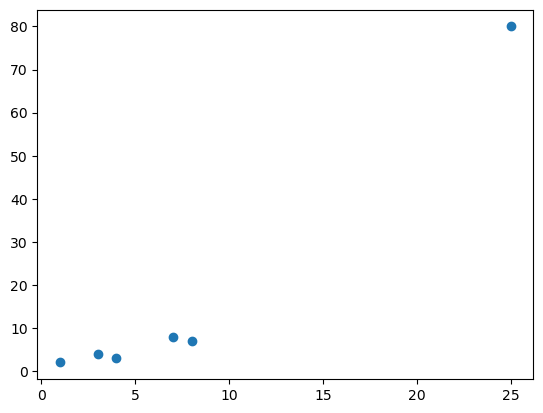

In [3]:
plt.scatter(X[:,0],X[:,1])

In [4]:
cl = DBSCAN(eps =3,min_samples=2).fit(X)

In [5]:
cl.labels_

array([ 0,  0,  0,  1,  1, -1], dtype=int64)

In [6]:
from sklearn.cluster import KMeans

In [7]:
kmeans =KMeans(n_clusters =3,random_state=42).fit(X)

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
kmeans.labels_

array([2, 2, 2, 0, 0, 1])

In [9]:
kmeans.cluster_centers_

array([[ 7.5       ,  7.5       ],
       [25.        , 80.        ],
       [ 2.66666667,  3.        ]])

In [12]:
kmeans.predict([[20,40],[30,51]])

array([0, 1])

In [16]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
sns.set()

In [18]:
X,y = make_blobs(n_samples = 200, centers= 4, cluster_std= 0.60,random_state=12)


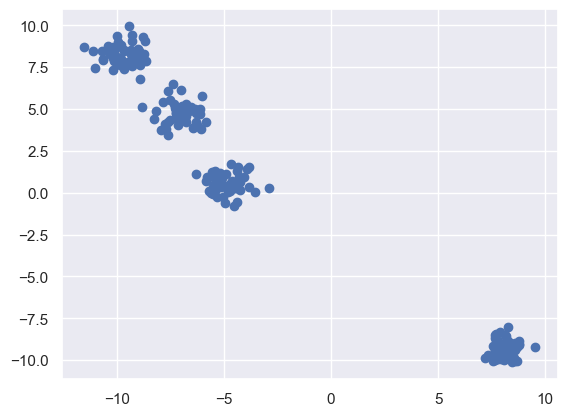

In [19]:
plt.scatter(X[:,0],X[:,1])

In [20]:
samples =[[0.,0.6,0.],[0.,.5,0.],[1.,1.,.5]]
neigh = NearestNeighbors(n_neighbors=2)

In [21]:
neigh.fit(samples)

NearestNeighbors(n_neighbors=2)

In [23]:
NearestNeighbors(n_neighbors=2)
print(neigh.kneighbors([[0,0.4,0.2]]))

(array([[0.2236068 , 0.28284271]]), array([[1, 0]], dtype=int64))


In [25]:
neigh =NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distance,indices =nbrs.kneighbors(X)


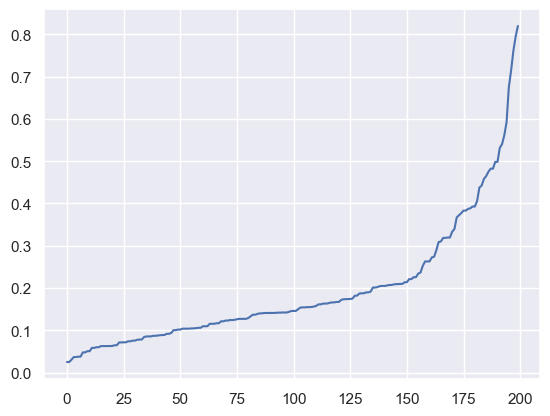

In [26]:
distance = np.sort(distance,axis=0)
distance = distance[:,1]
plt.plot(distance)

In [27]:
dbscan = DBSCAN(eps =0.9,min_samples=2)
dbscan.fit(X)

DBSCAN(eps=0.9, min_samples=2)

In [28]:
clusters =dbscan.labels_

In [29]:
len(set(clusters))

4

In [30]:
from sklearn.metrics import silhouette_score

In [31]:
silhouette_score(X,clusters)

0.795849071495419

In [32]:
import pandas  as pd
import numpy as np
%matplotlib inline

In [39]:
df =pd.read_csv('Mall_Customers.csv')

In [41]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [43]:
df = df.loc[:,['Age','Annual Income (k$)']]

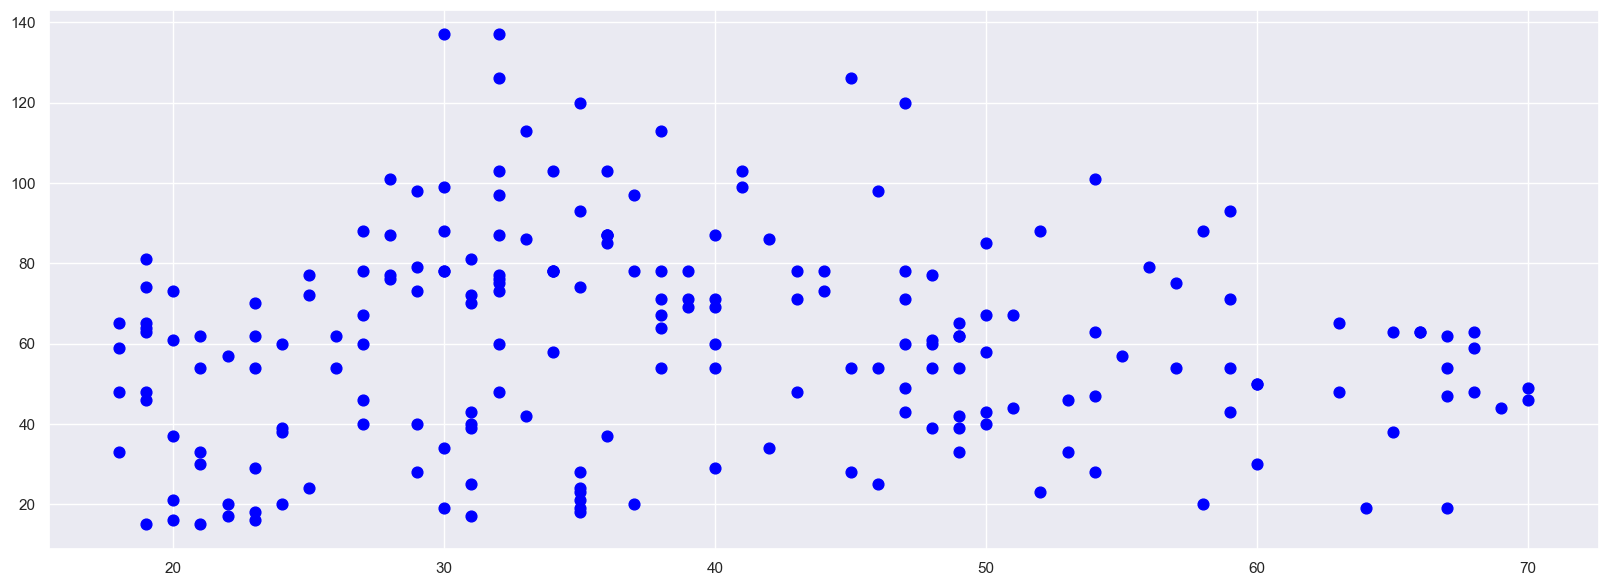

In [45]:
plt.figure(figsize=(20,7))
plt.scatter(df[['Age']],df[['Annual Income (k$)']],s = 60,c = 'blue')

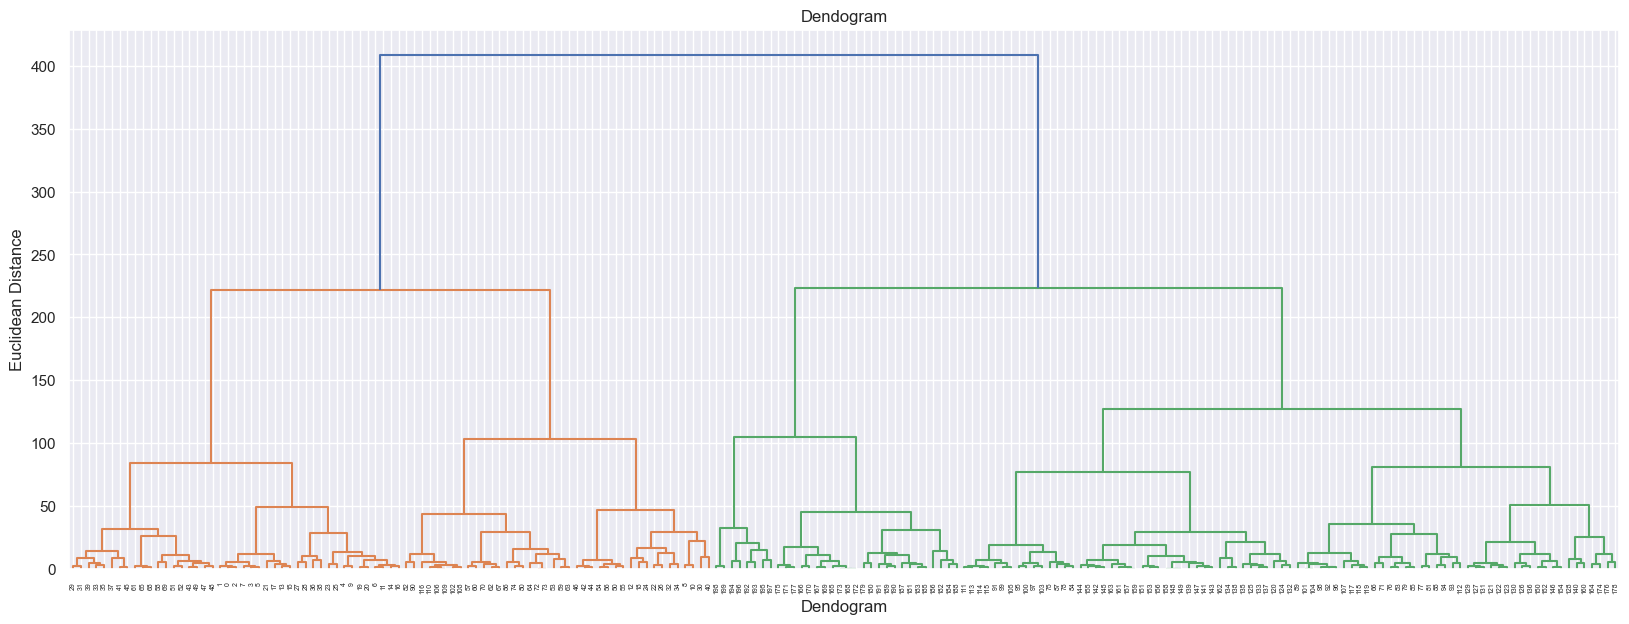

In [46]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,7))
dendogram = sch.dendrogram(sch.linkage(df,method='ward'))
plt.title('Dendogram')
plt.xlabel('Dendogram')
plt.ylabel('Euclidean Distance')
plt.show()

In [48]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit_predict(df)

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [49]:
cl = cluster.fit_predict(df)

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [50]:
from sklearn.metrics import silhouette_score
silhouette_score(df,cl)

0.4104652474372429

In [51]:
X =df.values

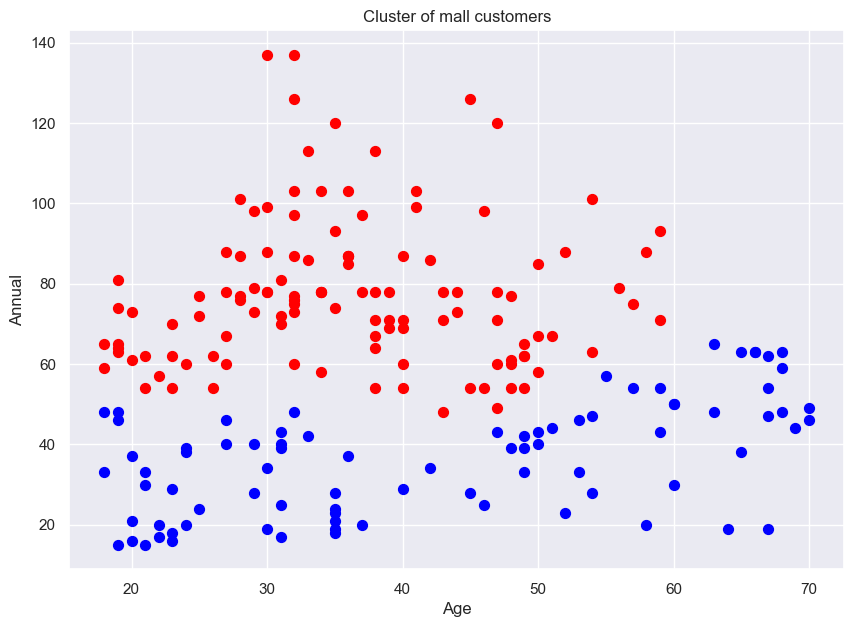

In [53]:
plt.figure(figsize=(10,7))
plt.scatter(X[cl==0,0],X[cl==0,1],s =50, c='red',label = 'Cluster1')
plt.scatter(X[cl==1,0],X[cl==1,1],s =50, c='blue',label = 'Cluster2')
plt.title('Cluster of mall customers')
plt.xlabel('Age')
plt.ylabel('Annual')
plt.show()

In [54]:
#trying dbscan
from sklearn.neighbors import NearestNeighbors
ne = NearestNeighbors(n_neighbors=2)
nb =ne.fit(X)
distances,indices = nb.kneighbors(X)

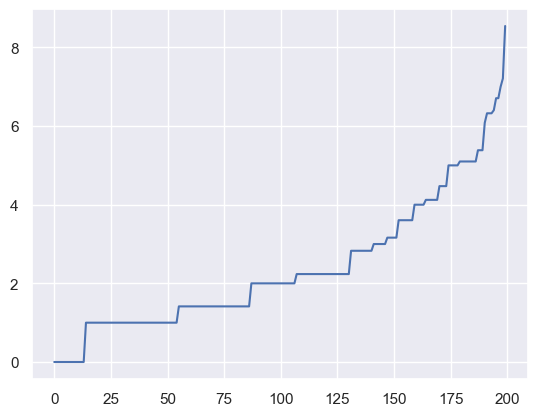

In [56]:
distances = np.sort(distances,axis=0)
distances = distances[:,1]
plt.plot(distances)

In [57]:
from sklearn.cluster import DBSCAN
dbscanCluster= DBSCAN(eps=8,min_samples=5)
dbscanCluster.fit(X)
clusters =dbscanCluster.labels_

In [58]:
len(set(clusters))

2

In [59]:
silhouette_score(X,clusters)

0.34901434719951013

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chun

Text(0, 0.5, 'Clustering score')

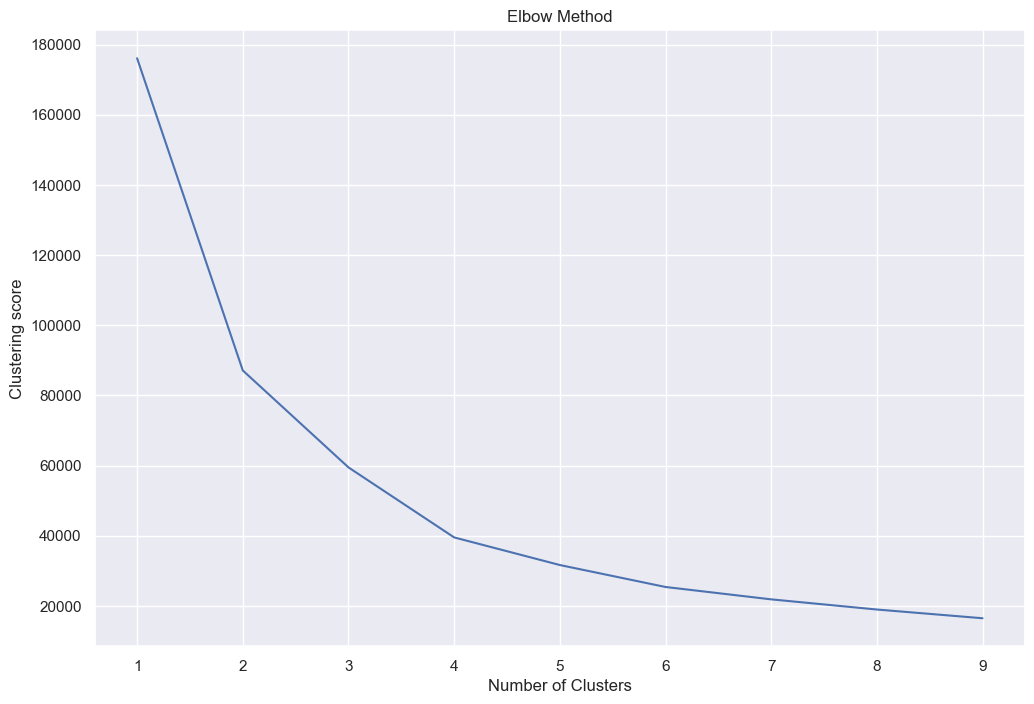

In [60]:
from sklearn.cluster import  KMeans
ics =[]
for i in range(1,10):
    kmeans =KMeans(n_clusters=i,init = 'random',random_state=42)
    kmeans.fit(X)
    ics.append(kmeans.inertia_)

    
plt.figure(figsize = (12,8))
plt.plot(range(1,10),ics)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering score')

In [61]:
#fit the model and predict

In [62]:
kmeans = KMeans(n_clusters=2,random_state=2)
kmeans.fit(X)
pred =kmeans.predict(X)
pred

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [63]:
silhouette_score(X,pred)

0.42620850066216065

In [64]:
# result of the scaled data:

In [65]:
from sklearn.preprocessing import normalize
scaled = normalize(X)
scaled = pd.DataFrame(scaled)
scaled.head()

,0,1
0,0.784883,0.619644
1,0.813733,0.581238
2,0.780869,0.624695
3,0.820905,0.571064
4,0.876812,0.480833


C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chun

Text(0, 0.5, 'Clustering score')

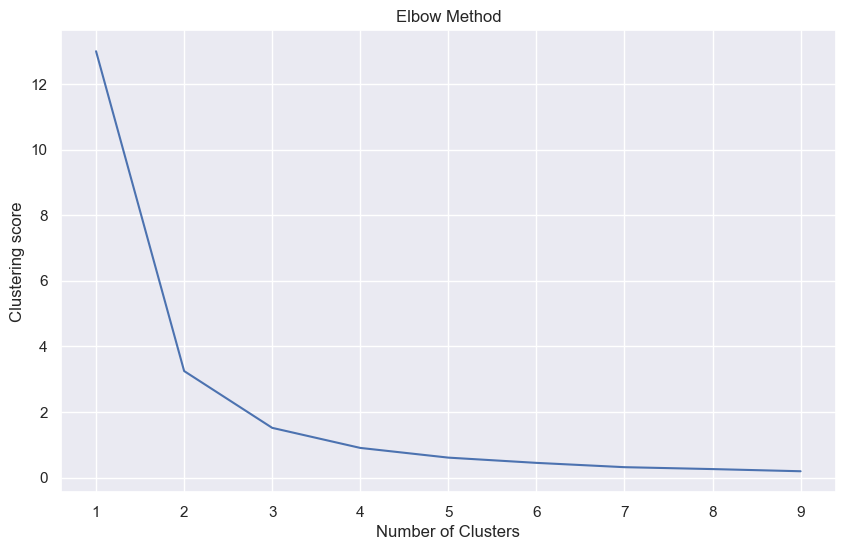

In [66]:
ics =[]
for i in range(1,10):
    kmeans =KMeans(n_clusters=i,init = 'random',random_state=42)
    kmeans.fit(scaled)
    ics.append(kmeans.inertia_)
    
plt.figure(figsize = (10,6))
plt.plot(range(1,10),ics)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering score')

In [67]:
#fit model and predict
kmeans = KMeans(n_clusters=2,random_state=42)
kmeans.fit(scaled)
pred = kmeans.predict(scaled)
pred

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [68]:
silhouette_score(scaled,pred)

0.6420367225684419